In [2]:
library(Hmisc)
library(car)
library(ggplot2)
library(lattice)
library(survival)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [3]:
data = read.csv("boston-data-clean.csv")

In [4]:
data

TOWN,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
Lynn,20.4,0.62976,0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,8.26
Lynn,18.2,0.63796,0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,10.26
Lynn,19.9,0.62739,0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,8.47
Lynn,23.1,1.05393,0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,6.58
Lynn,17.5,0.78420,0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,14.67
Lynn,20.2,0.80271,0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,11.69
Lynn,18.2,0.72580,0,8.14,0,0.538,5.727,69.5,3.7965,4,307,21.0,11.28
Lynn,13.6,1.25179,0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,21.02
Lynn,19.6,0.85204,0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,13.83
Lynn,15.2,1.23247,0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,18.72


In [5]:
summary(data)

         TOWN          MEDV            CRIM               ZN         
 Boston    :132   Min.   : 5.00   Min.   : 0.2452   Min.   : 0.0000  
 Brookline : 12   1st Qu.:13.40   1st Qu.: 0.8253   1st Qu.: 0.0000  
 Cambridge : 30   Median :17.50   Median : 4.0384   Median : 0.0000  
 Lynn      : 22   Mean   :19.93   Mean   : 7.4694   Mean   : 0.9959  
 Newton    : 18   3rd Qu.:22.80   3rd Qu.: 9.5136   3rd Qu.: 0.0000  
 Quincy    : 12   Max.   :50.00   Max.   :88.9762   Max.   :20.0000  
 Somerville: 15                                                      
     INDUS            CHAS              NOX               RM       
 Min.   : 3.97   Min.   :0.00000   Min.   :0.5040   Min.   :3.561  
 1st Qu.: 9.90   1st Qu.:0.00000   1st Qu.:0.5800   1st Qu.:5.759  
 Median :18.10   Median :0.00000   Median :0.6310   Median :6.142  
 Mean   :15.61   Mean   :0.08299   Mean   :0.6457   Mean   :6.182  
 3rd Qu.:18.10   3rd Qu.:0.00000   3rd Qu.:0.7130   3rd Qu.:6.485  
 Max.   :21.89   Max.   :1.00000

Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
“'rlm' failed to converge in 20 steps”

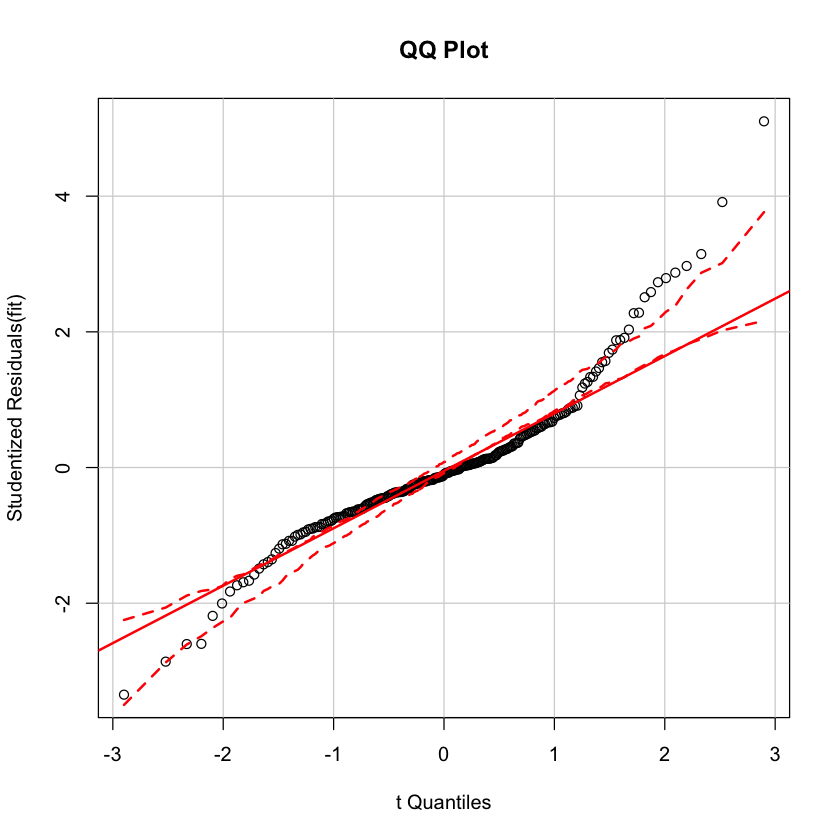

In [6]:
fit <- lm(MEDV~ TOWN + as.factor(PTRATIO) + AGE + DIS + as.factor(RAD) + as.factor(TAX) + RM + as.factor(NOX) + as.factor(CHAS) + as.factor(INDUS) + as.factor(ZN)+ CRIM + LSTAT, data=data)
qqPlot(fit, main="QQ Plot")

In [7]:
summary(fit)


Call:
lm(formula = MEDV ~ TOWN + as.factor(PTRATIO) + AGE + DIS + as.factor(RAD) + 
    as.factor(TAX) + RM + as.factor(NOX) + as.factor(CHAS) + 
    as.factor(INDUS) + as.factor(ZN) + CRIM + LSTAT, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2456  -2.0338  -0.3462   1.4264  16.2999 

Coefficients: (27 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             9.69862    5.08179   1.909 0.057703 .  
TOWNBrookline           6.92214    2.19568   3.153 0.001857 ** 
TOWNCambridge          -0.70458    2.01104  -0.350 0.726427    
TOWNLynn                0.18281    2.73368   0.067 0.946746    
TOWNNewton              6.97304    2.52727   2.759 0.006312 ** 
TOWNQuincy             -0.63996    2.27261  -0.282 0.778532    
TOWNSomerville         -2.33304    1.95890  -1.191 0.235013    
as.factor(PTRATIO)14.7       NA         NA      NA       NA    
as.factor(PTRATIO)17.4       NA         NA      NA

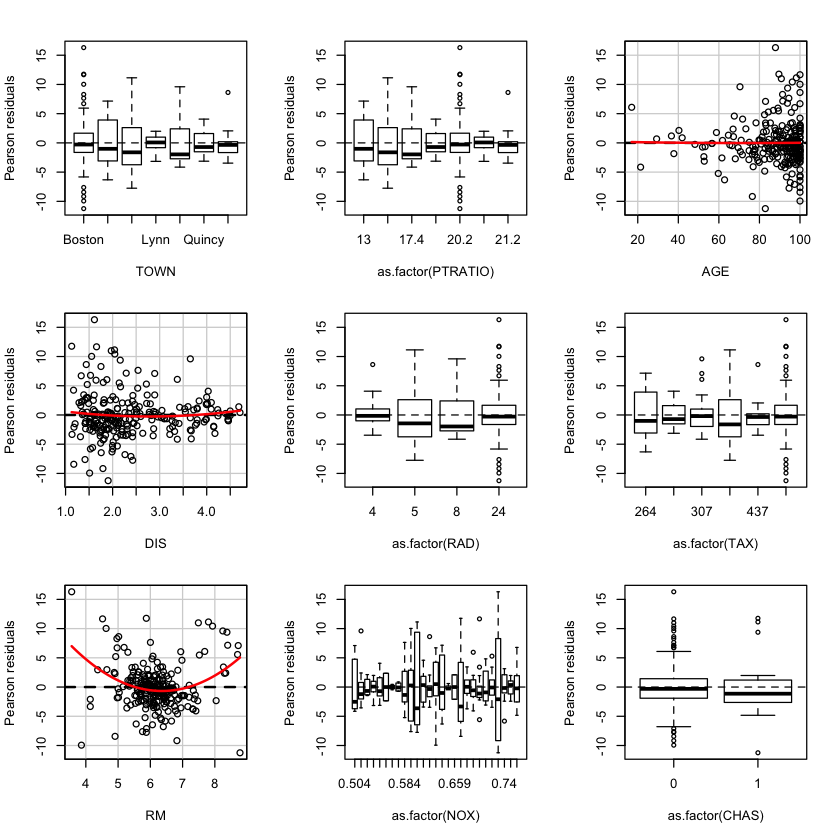

,Test stat,Pr(>|t|)
TOWN,NA,NA
as.factor(PTRATIO),NA,NA
AGE,0.089,0.929
DIS,1.632,0.104
as.factor(RAD),NA,NA
as.factor(TAX),NA,NA
RM,6.099,0.000
as.factor(NOX),NA,NA
as.factor(CHAS),NA,NA
as.factor(INDUS),NA,NA


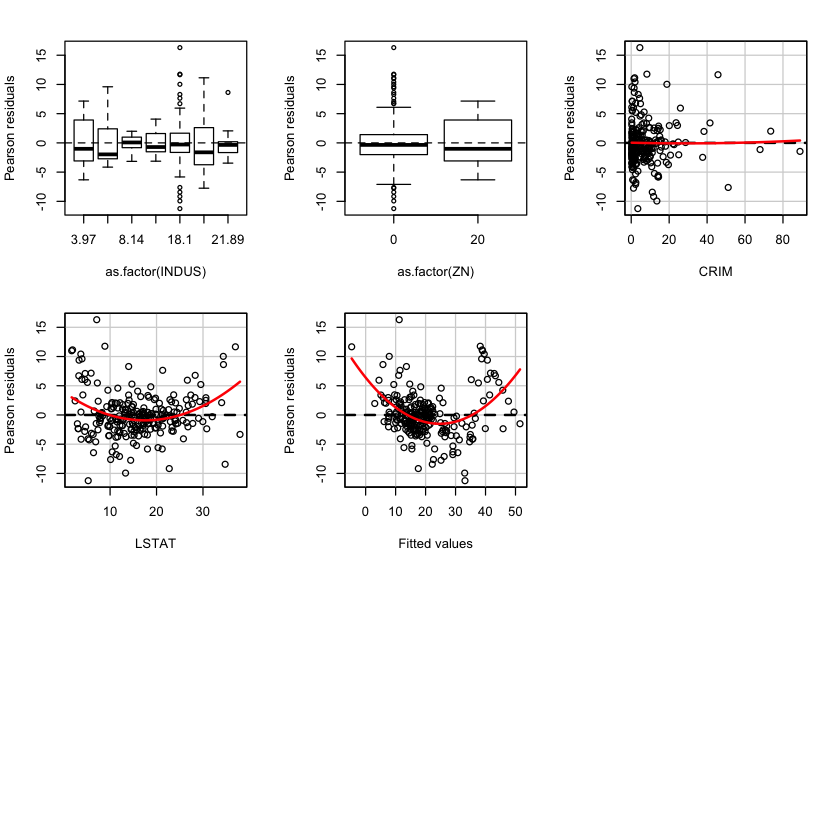

In [9]:
residualPlots(fit)

In [8]:
alias(fit)

Model :
MEDV ~ TOWN + as.factor(PTRATIO) + AGE + DIS + as.factor(RAD) + 
    as.factor(TAX) + RM + as.factor(NOX) + as.factor(CHAS) + 
    as.factor(INDUS) + as.factor(ZN) + CRIM + LSTAT

Complete :
                       (Intercept) TOWNBrookline TOWNCambridge TOWNLynn
as.factor(PTRATIO)14.7  0           0             1             0      
as.factor(PTRATIO)17.4  0           0             0             0      
as.factor(PTRATIO)18.4  0           0             0             0      
as.factor(PTRATIO)20.2  1          -1            -1            -1      
as.factor(PTRATIO)21    0           0             0             1      
as.factor(PTRATIO)21.2  0           0             0             0      
as.factor(RAD)5         0           1             1             0      
as.factor(RAD)8         0           0             0             0      
as.factor(RAD)24        1          -1            -1            -1      
as.factor(TAX)304       0           0             0             0      
as.factor

In [10]:
coefficients(fit)

(Intercept)          TOWNBrookline          TOWNCambridge 
            9.69862174             6.92213731            -0.70457525 
              TOWNLynn             TOWNNewton             TOWNQuincy 
            0.18281222             6.97304246            -0.63996075 
        TOWNSomerville as.factor(PTRATIO)14.7 as.factor(PTRATIO)17.4 
           -2.33303881                     NA                     NA 
as.factor(PTRATIO)18.4 as.factor(PTRATIO)20.2   as.factor(PTRATIO)21 
                    NA                     NA                     NA 
as.factor(PTRATIO)21.2                    AGE                    DIS 
                    NA            -0.04113209            -1.88892540 
       as.factor(RAD)5        as.factor(RAD)8       as.factor(RAD)24 
                    NA                     NA                     NA 
     as.factor(TAX)304      as.factor(TAX)307      as.factor(TAX)403 
                    NA                     NA                     NA 
     as.factor(TAX)437      as.factor(TAX)666                     RM 
                    NA                     NA             4.27617165 
   as.factor(NOX)0.507    as.factor(NOX)0.532    as.factor(NOX)0.538 
           -1.57341099            -0.23299719                     NA 
   as.factor(NOX)0.544    as.factor(NOX)0.575     as.factor(NOX)0.58 
                    NA             6.39243505             1.34986055 
   as.factor(NOX)0.583    as.factor(NOX)0.584    as.factor(NOX)0.597 
            0.06532489            -4.99073465             2.55020831 
   as.factor(NOX)0.605    as.factor(NOX)0.614    as.factor(NOX)0.624 
            6.34074172            -1.05403853                     NA 
   as.factor(NOX)0.631    as.factor(NOX)0.647    as.factor(NOX)0.655 
           20.76187635                     NA             0.39960857 
   as.factor(NOX)0.659    as.factor(NOX)0.668    as.factor(NOX)0.671 
            4.98809928            14.78310171            -8.38548524 
   as.factor(NOX)0.679    as.factor(NOX)0.693      as.factor(NOX)0.7 
           -7.27962009            -6.66714621            -0.62773209 
   as.factor(NOX)0.713    as.factor(NOX)0.718     as.factor(NOX)0.74 
           -5.12758036            -3.48227460            -5.04854316 
    as.factor(NOX)0.77    as.factor(NOX)0.871       as.factor(CHAS)1 
                    NA                     NA            -0.94245950 
   as.factor(INDUS)6.2   as.factor(INDUS)8.14    as.factor(INDUS)9.9 
                    NA                     NA                     NA 
  as.factor(INDUS)18.1  as.factor(INDUS)19.58  as.factor(INDUS)21.89 
                    NA                     NA                     NA 
       as.factor(ZN)20                   CRIM                  LSTAT 
                    NA            -0.05315783            -0.46893373

Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
“'rlm' failed to converge in 20 steps”

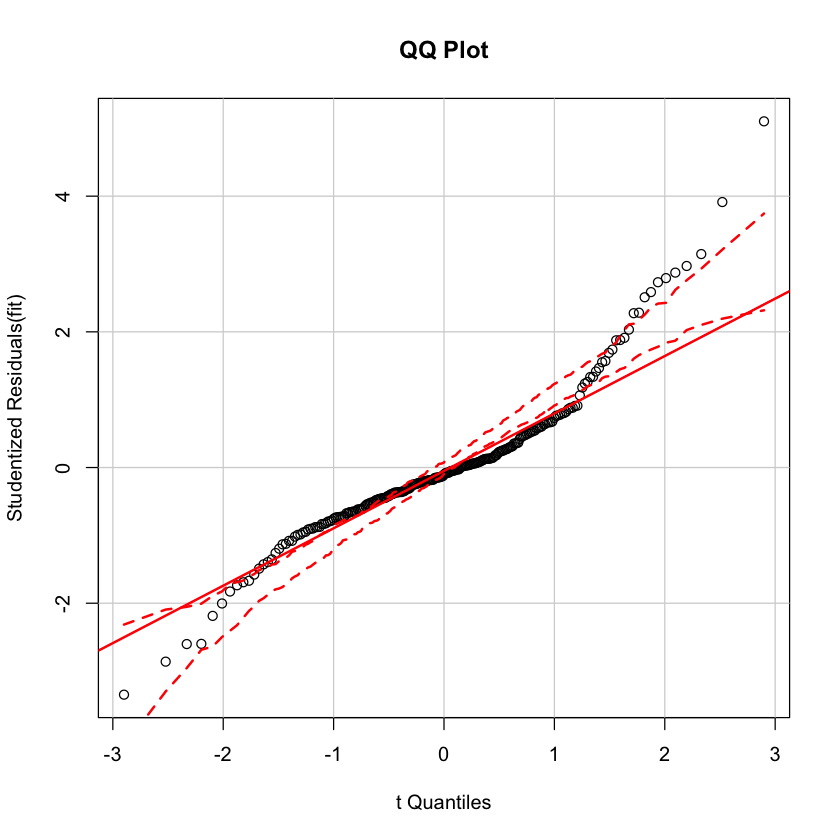

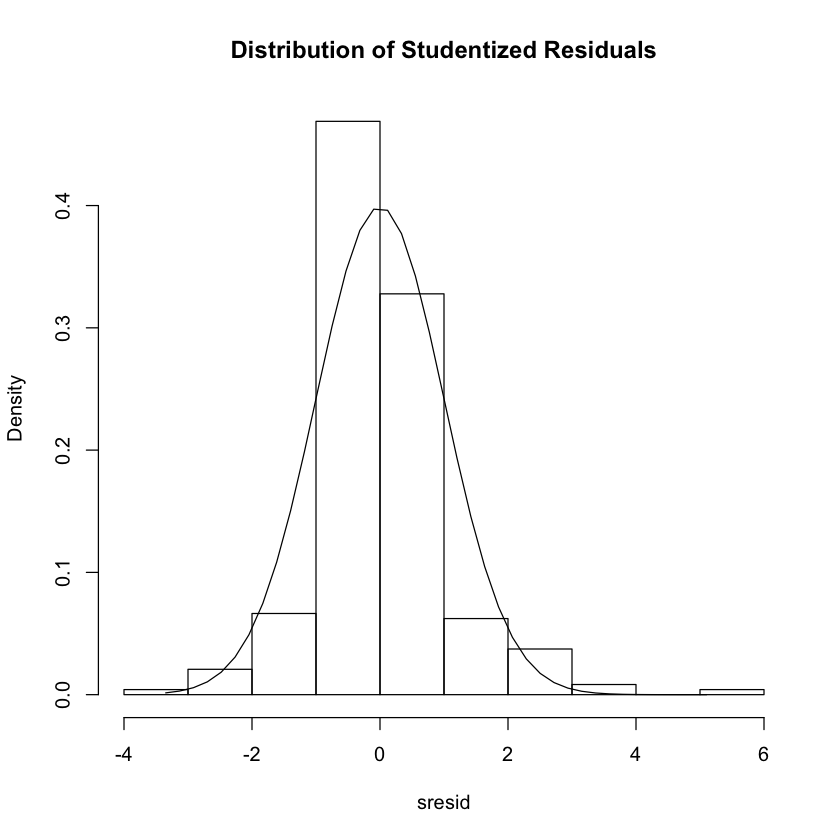

In [12]:
# Normality of Residuals
# qq plot for studentized resid
qqPlot(fit, main="QQ Plot")
# distribution of studentized residuals
library(MASS)
sresid <- studres(fit) 
hist(sresid, freq=FALSE, 
   main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40) 
yfit<-dnorm(xfit) 
lines(xfit, yfit)